In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_pickle('df_limpo.pkl')

In [ ]:
# Agrupamento para Análise Diagnóstica
desempenho_exercido = df.groupby("Órgão Superior")[["Taxa Liquidação", "Taxa de Pagamento"]].mean()
rank_pagamento = desempenho_exercido.sort_values("Taxa de Pagamento", ascending=False)
top10_eficiencia = rank_pagamento.head(10)
eficiencia_baixa = rank_pagamento.tail(10)

In [4]:
# Análise Descritiva (Órgãos que mais/menos gastaram)
orgao_gasto = df.groupby("Órgão Superior")["Valor Pago"].sum().reset_index()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_8004\4287592176.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Valor Pago", y="Órgão Superior", data=top10_gasto, palette="viridis")


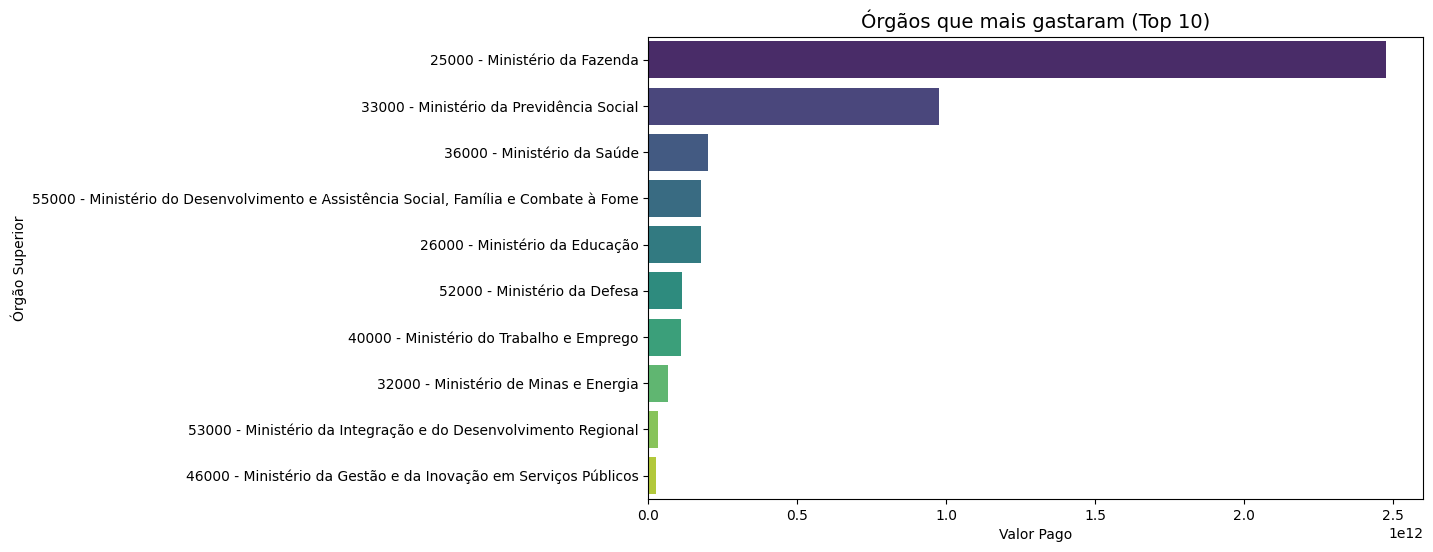

In [6]:
# Top 10 Gastos
top10_gasto = orgao_gasto.sort_values("Valor Pago", ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Valor Pago", y="Órgão Superior", data=top10_gasto, palette="viridis")
plt.title("Órgãos que mais gastaram (Top 10)", fontsize=14)

plt.show()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_8004\4108295404.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Valor Pago", y="Órgão Superior", data=dez_menores, palette="viridis_r")


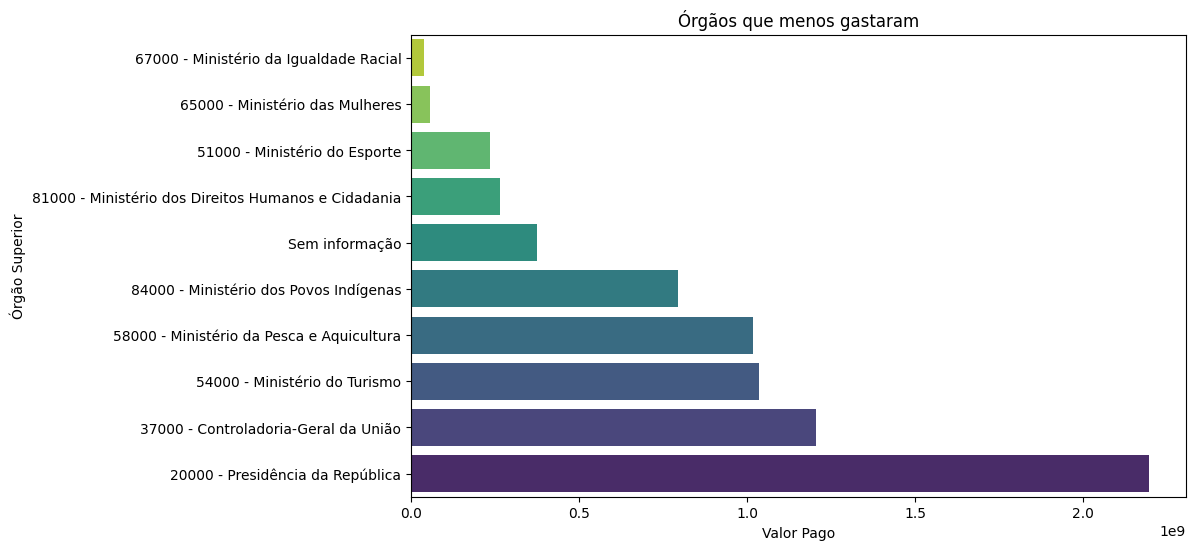

In [8]:
# 10 menores Gastos
dez_menores = orgao_gasto.sort_values("Valor Pago", ascending=True).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Valor Pago", y="Órgão Superior", data=dez_menores, palette="viridis_r")
plt.title("Órgãos que menos gastaram")
plt.show()

In [9]:
# Análise Temporal (Evolução Liquidado x Pago)
despesa_mensal = df.groupby('Mês Ano')[['Valor Pago', 'Valor Liquidado']].sum()

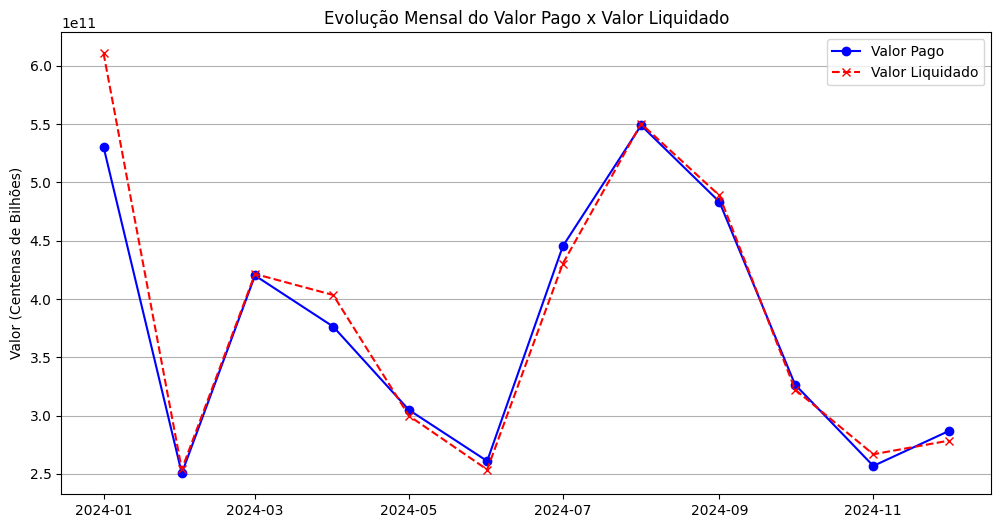

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(despesa_mensal.index, despesa_mensal['Valor Pago'], marker='o', label='Valor Pago', color='blue')
plt.plot(despesa_mensal.index, despesa_mensal['Valor Liquidado'], marker='x', label='Valor Liquidado', linestyle='--', color='red') 
plt.title('Evolução Mensal do Valor Pago x Valor Liquidado')
plt.ylabel('Valor (Centenas de Bilhões)')
plt.legend()
plt.grid(axis='y')

plt.show()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_8004\1456833332.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taxa de Pagamento", y="Órgão Superior", data=top10_eficiencia, palette="Greens_r")


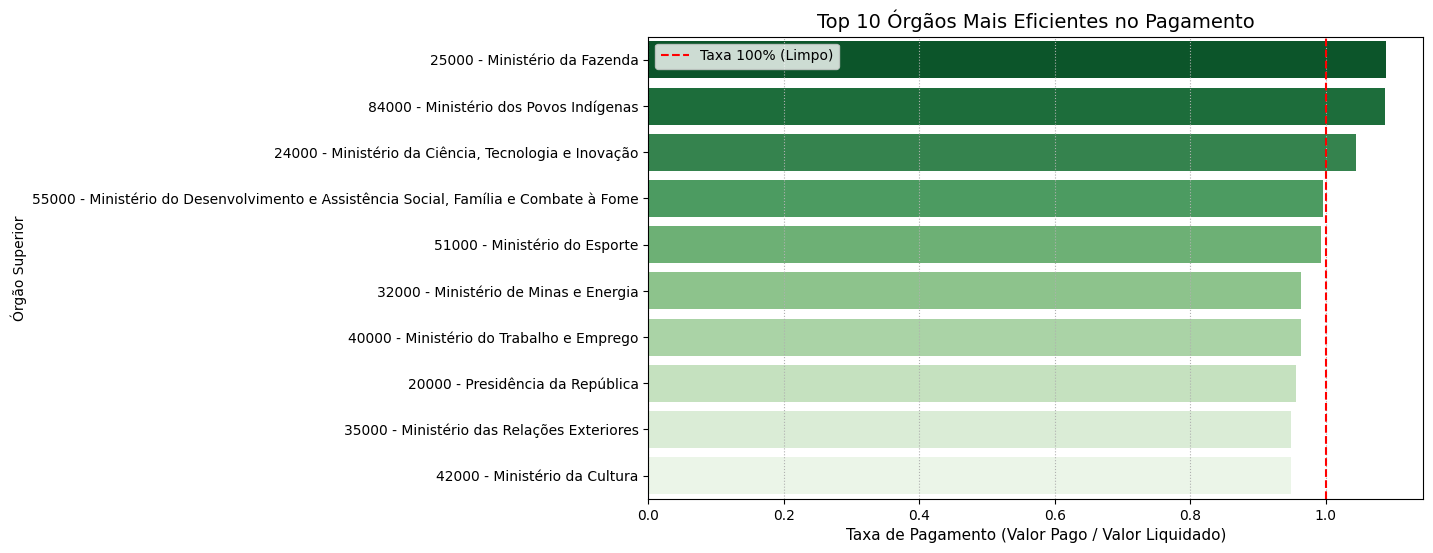

In [11]:
# Análise Diagnóstica (Ranqueamento de Eficiência)

# Top 10 Eficiência
plt.figure(figsize=(10, 6))
sns.barplot(x="Taxa de Pagamento", y="Órgão Superior", data=top10_eficiencia, palette="Greens_r")
plt.axvline(1.0, color='red', linestyle='--', linewidth=1.5, label='Taxa 100% (Limpo)')
plt.title("Top 10 Órgãos Mais Eficientes no Pagamento", fontsize=14)
plt.xlabel("Taxa de Pagamento (Valor Pago / Valor Liquidado)", fontsize=11)
plt.legend()
plt.grid(axis='x', linestyle=':')

plt.show()

C:\Users\Usuário\AppData\Local\Temp\ipykernel_8004\1901323409.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taxa de Pagamento", y="Órgão Superior", data=eficiencia_baixa, palette="Reds_r")


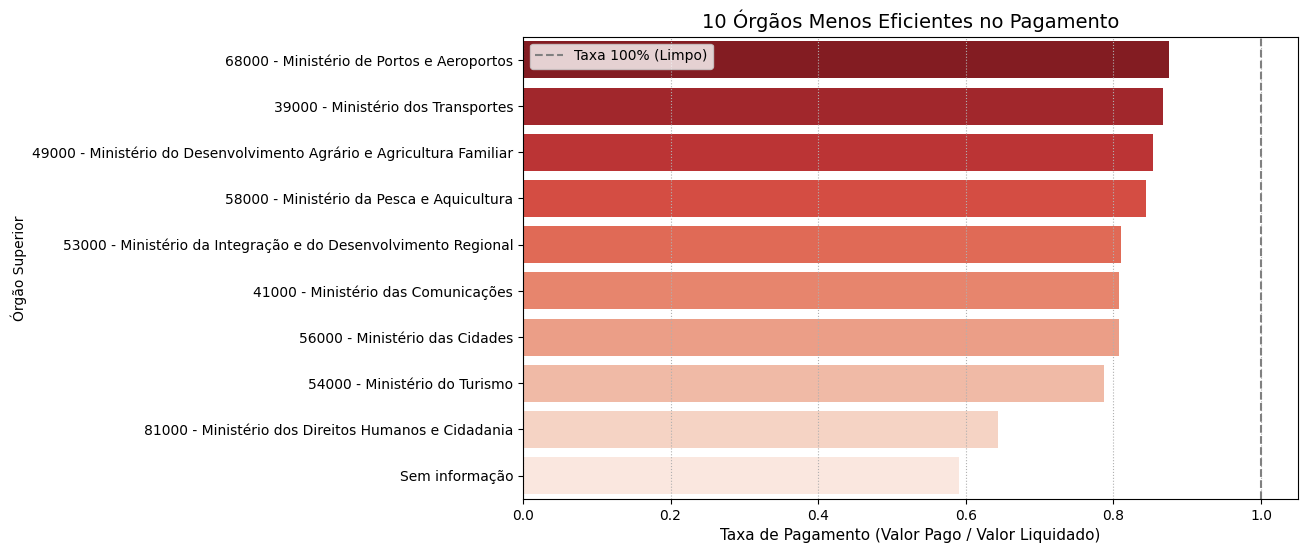

In [13]:
# os 10 Órgãos com menor Eficiência
plt.figure(figsize=(10, 6))
sns.barplot(x="Taxa de Pagamento", y="Órgão Superior", data=eficiencia_baixa, palette="Reds_r")
plt.axvline(1.0, color='gray', linestyle='--', linewidth=1.5, label='Taxa 100% (Limpo)')
plt.title("10 Órgãos Menos Eficientes no Pagamento", fontsize=14)
plt.xlabel("Taxa de Pagamento (Valor Pago / Valor Liquidado)", fontsize=11)
plt.legend()
plt.grid(axis='x', linestyle=':')
plt.show()